## **Visualizing Outputs**##


## Step 1: Import the Required Libraries and Load the Dataset

- Import pandas and read the Pokemon
- Filter the data set to include only Grass, Fire, and Water types


In [59]:
import pandas as pd
df_orig = pd.read_csv('../../Datasets/pokemon.csv', encoding='unicode_escape')
df_orig.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


__Observation:__
- Here, we can see the output, which contains categorical variables.

In [60]:
#Extract only the Type1 that we are interested on (3 kinds only)...
types = df_orig['Type 1'].isin(['Grass', 'Fire', 'Water'])

drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary']

#Select only those types and eliminate columns that we are not interested
df = df_orig[types].drop(columns = drop_cols)

df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,318,45,49,49,65,65,45
1,2,Ivysaur,405,60,62,63,80,80,60
2,3,Venusaur,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,4,Charmander,309,39,52,43,60,50,65


In [61]:
types

0       True
1       True
2       True
3       True
4       True
       ...  
795    False
796    False
797    False
798    False
799     True
Name: Type 1, Length: 800, dtype: bool

__Observation:__ 
- We can see that the categorical variable has been dropped.

## Step 2: Create a K-Means Cluster

- Import K-Means from sklearn.cluster
- Fit the data set to the Attack and Defense columns and assign cluster labels
- Create a centroid so that we will know the exact centroid points for each cluster
- Add centroids and color information to the DataFrame


In [62]:
from sklearn.cluster import KMeans
import numpy as np

#Create model (we set to 3 clusters, expecting the model will identify 3 groups)
# The model will give us 3 groups of pokemons based on attack and deffence.
# to identify how powerful they are.
kmeans = KMeans(n_clusters=3, random_state=0)
# kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# df['cluster'] = kmeans.fit_predict(df[['Attack', 'Speed']])
# df['cluster'] = kmeans.fit_predict(df[['Defense', 'Speed']])

centroids = kmeans.cluster_centers_
centroids

array([[ 84.52475248,  72.05940594],
       [ 50.25581395,  49.94186047],
       [105.93617021, 108.0212766 ]])

In [63]:


cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4]})
# df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4]})

#Label clusters with different colors
colors = ['#DF2020', '#81DF20', '#2095DF']
# colors = ['#DF2020', '#81DF20', '#2095DF', '#49FD34', '#fc02b3']

#Cluster groups by color
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
# df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

## Step 3: Create Scatter Plots

- Create a scatter plot with Attack and Defense as x and y axes
- Create a scatter plot with Attack and Defense as x and y axes and speed as size


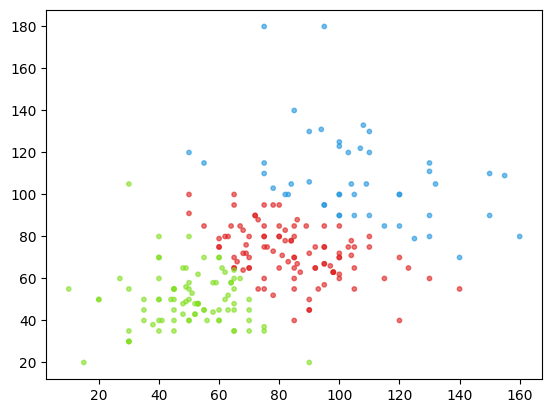

In [64]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)

__Observations:__
- Cluster output with K = 3
- We can see that there are three different clusters with three different colors.

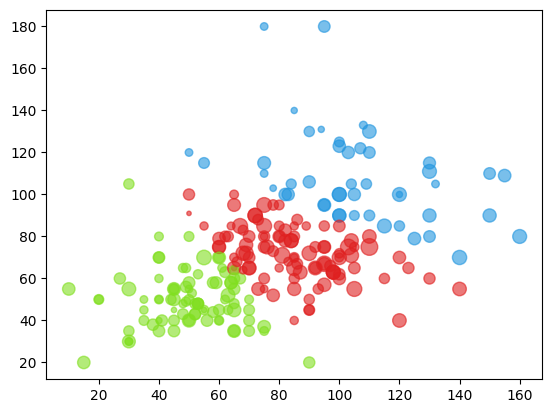

In [65]:
plt.scatter(df.Attack, df.Defense, c=df.c, s=df.Speed, alpha = 0.6)

__Observations:__
- Cluster output with K = 3
- We can see a scatter plot in which the data points for each cluster are highlighted.

## Step 4: Create a Centroid Point for Each of the Cluster

- Create a scatter plot with centroids and lines connecting centroids to their respective points
- Add legends and labels


Text(0, 0.5, 'Defense')

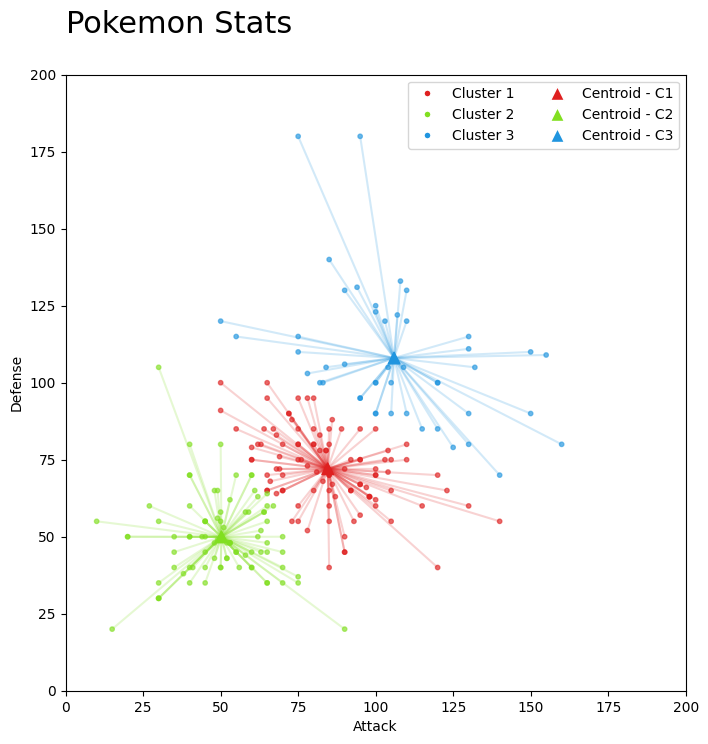

In [66]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, figsize=(8,8))

plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

for idx, val in df.iterrows():
    x = [val.Attack, val.cen_x,]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
    
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
  
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])

plt.legend(handles=legend_elements, loc='upper right', ncol=2)
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

__Observations:__
- We can see how the data is spread away from the centroid.
- We can see the cluster output with a centroid value and K = 3.
- This is how we can create the plot data for the cluster case.


## Step 5: Create a Plot with a Convex Hull Enclosing Each Cluster

- Create a scatter plot with centroids and a convex hull enclosing each cluster
- Import convex hull from scipy.spatial
- Compute the convex hull for each cluster and plot the shape


(0.0, 200.0)

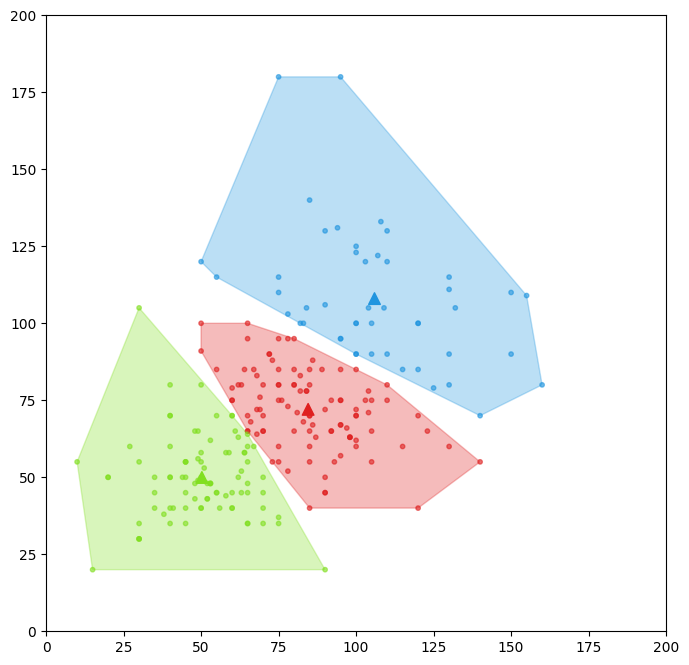

In [67]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)


__Observation:__
- Here, we can see the convex hull of the clusters.